In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
train = pd.read_csv('train.csv', encoding = 'latin-1')
test = pd.read_csv('test.csv', encoding = 'latin-1')

print(train.shape)
print(test.shape)

(120, 2)
(50, 2)


In [ ]:
train.head()

,tweets,Sentiment
0,Well done Dedan Kimathi University. Your coffe...,1
1,Dedan Kimathi University unveils machine power...,1
2,"Dedan Kimathi University, Nyeri county grows a...",1
3,Bad weather could allow mwe go get the dekut c...,-1
4,Local Premium coffee from Dedan Kimathi Univer...,1


In [ ]:
test.head()

,tweets,Sentiment
0,freezing!!  drinking coffee at Dedan Kimathi ...,1
1,Over 20 coffee buyers from the United Arab Emi...,-1
2,During the official Launch of Natural Extract ...,0
3,"TOMORROW, Coffee Expo will be held at Dedan Ki...",0
4,I did not like the dekut coffee youghut,-1


In [ ]:
train.isnull().any()
test.isnull().any()

tweets       False
Sentiment    False
dtype: bool

In [ ]:
# checking out the negative comments from the train set

train[train['Sentiment'] == -1].head(10)

,tweets,Sentiment
3,Bad weather could allow mwe go get the dekut c...,-1
10,Over 20 coffee buyers from the United Arab Emi...,-1
13,I did not like the dekut coffee youghut,-1
22,I prefer to buy roasted beans and grind them w...,-1
53,I hate coffee a lot,-1
64,Its realy hard to find dekut youghut in the ma...,-1
106,Just bought some Brookside yogurt. It's alrigh...,-1
116,I had a bad experience with dekut yought. It t...,-1


In [ ]:
# checking out the postive comments from the train set

train[train['Sentiment'] == 1].head(10)

,tweets,Sentiment
0,Well done Dedan Kimathi University. Your coffe...,1
1,Dedan Kimathi University unveils machine power...,1
2,"Dedan Kimathi University, Nyeri county grows a...",1
4,Local Premium coffee from Dedan Kimathi Univer...,1
7,"On a chilly day here at Mount Kenya region, co...",1
9,freezing!!  drinking coffee at Dedan Kimathi ...,1
14,AN INT'L COFFEE EXPO HELD IN KENYA ATTRACTS OV...,1
16,Webkenni: Dedan Kimathi university to oversee ...,1
21,Dedan Kimathi University have a good one too. ...,1
23,You can now buy Dedan Kimathi University premi...,1


<Axes: >

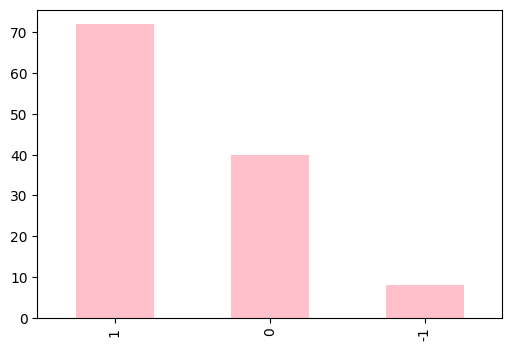

In [ ]:
train['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

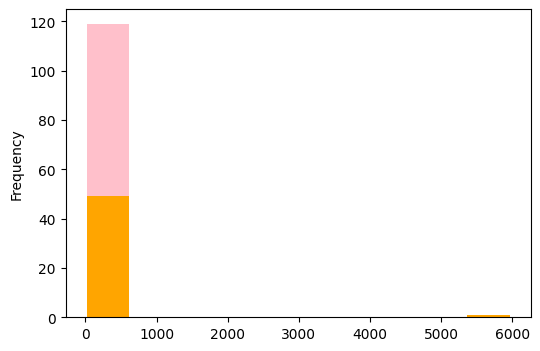

In [ ]:
# checking the distribution of tweets in the data

length_train = train['tweets'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweets'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [ ]:
# adding a column to represent the length of the tweet

train['len'] = train['tweets'].str.len()
test['len'] = test['tweets'].str.len()

train.head(10)

,tweets,Sentiment,len
0,Well done Dedan Kimathi University. Your coffe...,1,61
1,Dedan Kimathi University unveils machine power...,1,120
2,"Dedan Kimathi University, Nyeri county grows a...",1,112
3,Bad weather could allow mwe go get the dekut c...,-1,56
4,Local Premium coffee from Dedan Kimathi Univer...,1,66
5,Nyeri International Coffee Expo that is being ...,0,124
6,edan Kimathi university to oversee coffee mill...,0,77
7,"On a chilly day here at Mount Kenya region, co...",1,89
8,Dedan Kimathi University of Technology Coffee ...,0,85
9,freezing!!  drinking coffee at Dedan Kimathi ...,1,71


In [ ]:

train.groupby('Sentiment').describe()

len                                                            
          count        mean         std   min    25%    50%     75%     max
Sentiment                                                                  
-1          8.0   77.875000   63.550739  19.0  51.75   59.0   74.25   224.0
 0         40.0  276.350000  924.673152  45.0  83.25  102.0  199.00  5964.0
 1         72.0  139.527778   75.945676  35.0  78.75  113.0  218.25   280.0

<ipython-input-26-b9c8985338b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('len').mean()['Sentiment'].plot.hist(color = 'black', figsize = (6, 4),)


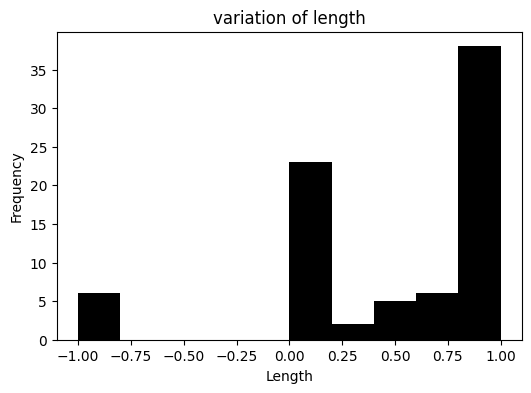

In [ ]:
train.groupby('len').mean()['Sentiment'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

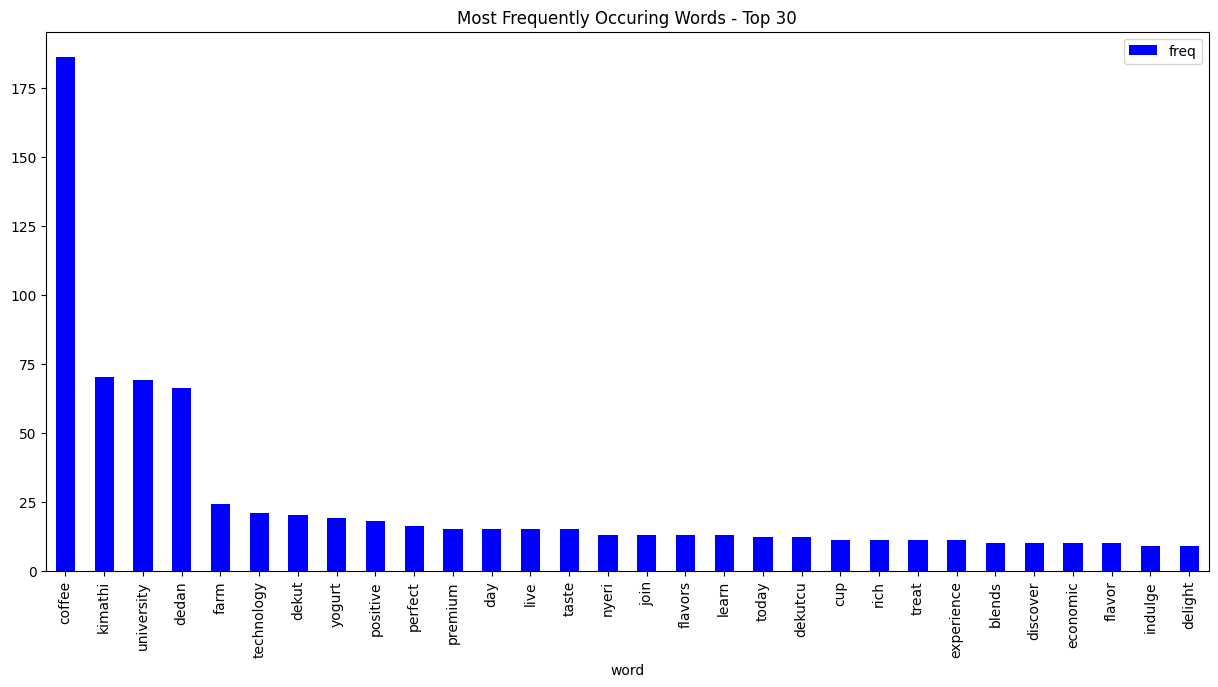

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweets)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

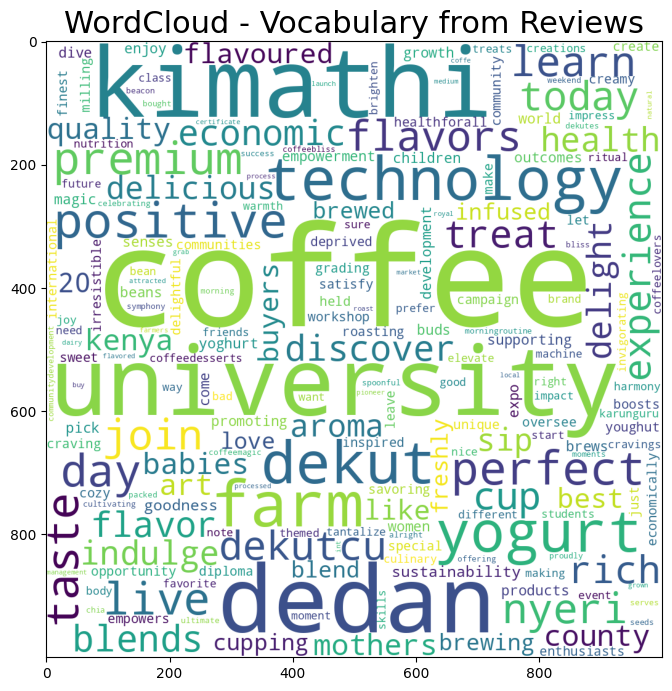

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

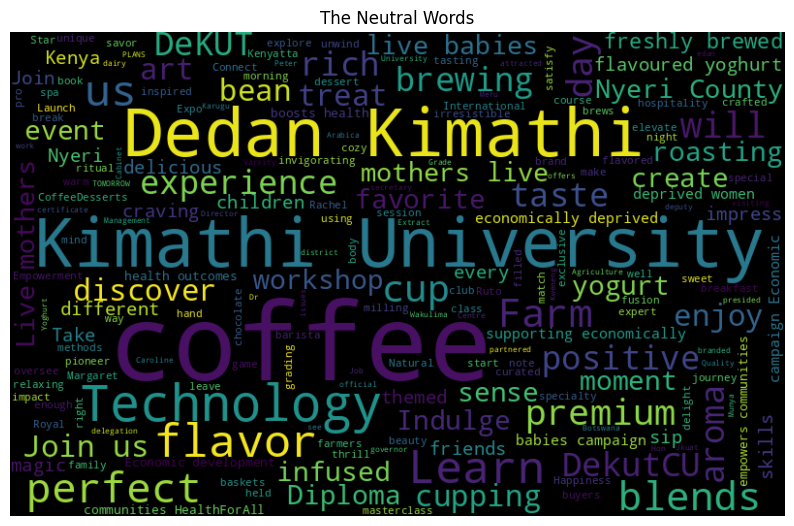

In [ ]:
normal_words =' '.join([text for text in train['tweets'][train['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


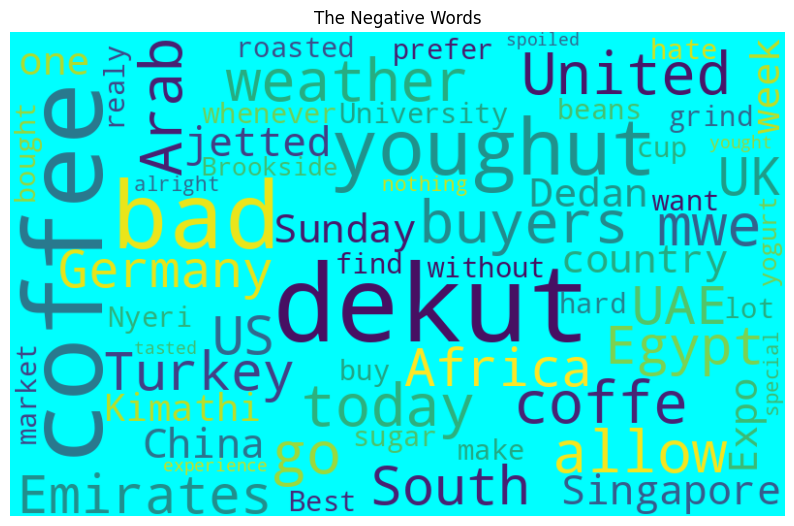

In [ ]:
negative_words =' '.join([text for text in train['tweets'][train['Sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


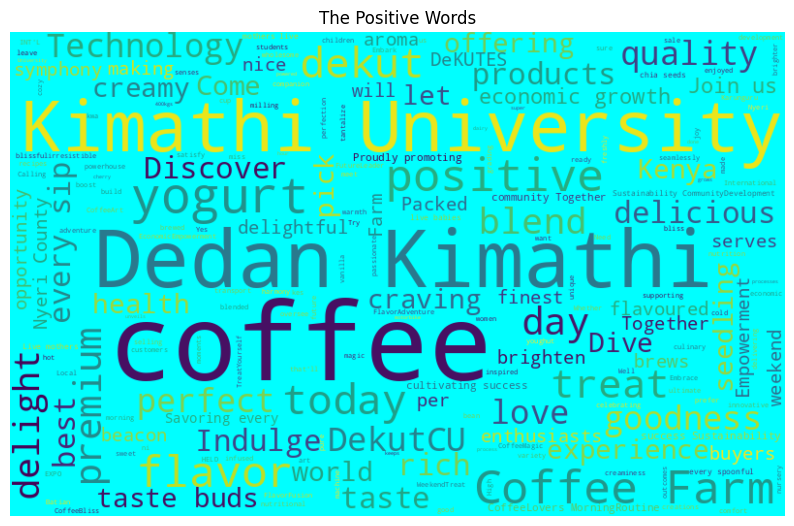

In [ ]:
positive_words =' '.join([text for text in train['tweets'][train['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()


In [ ]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_neutral = hashtag_extract(train['tweets'][train['Sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweets'][train['Sentiment'] == -1])
HT_positive = hashtag_extract(train['tweets'][train['Sentiment'] == 1])
# unnesting list
HT_neutral = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

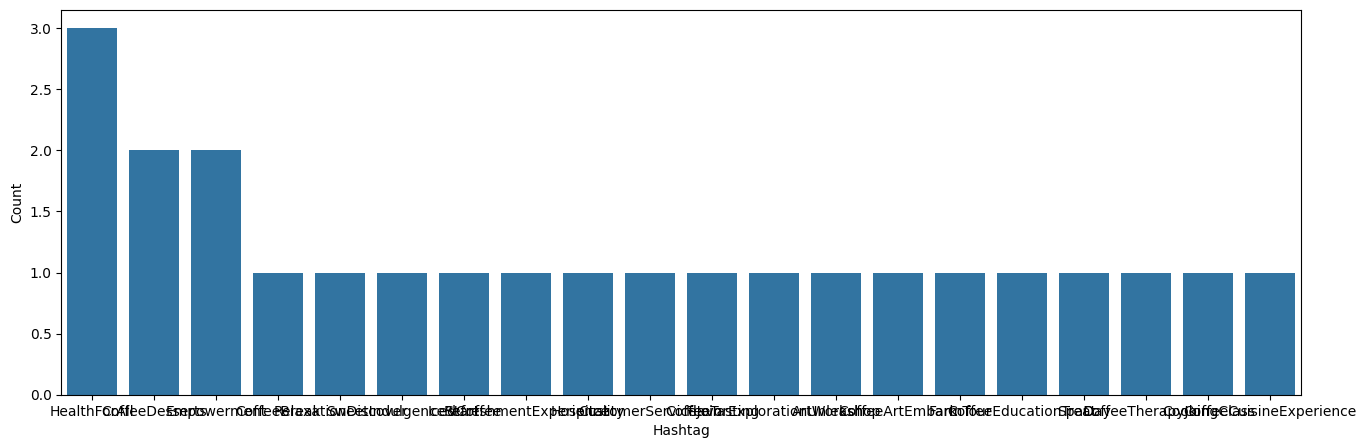

In [ ]:
import nltk
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

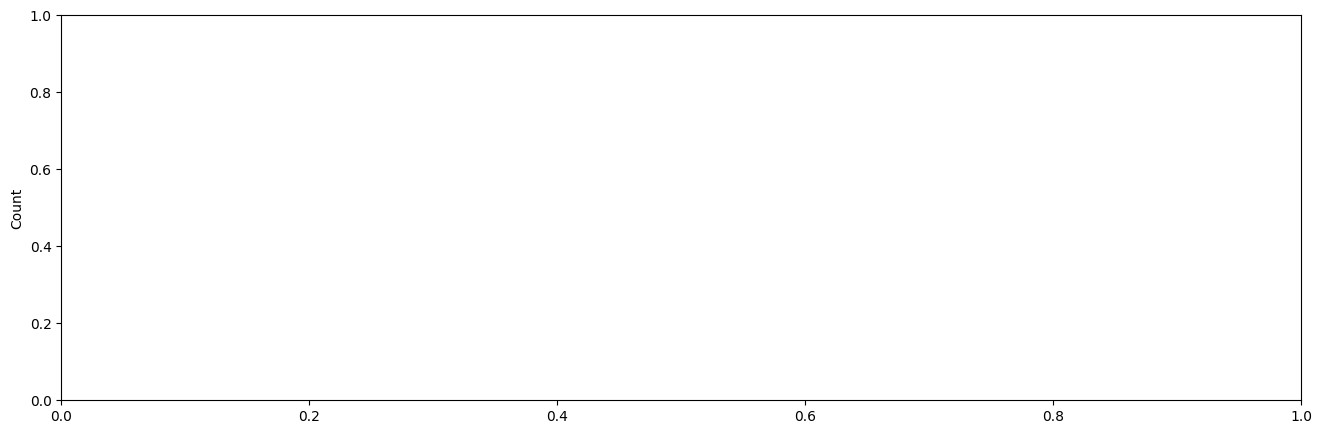

In [ ]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

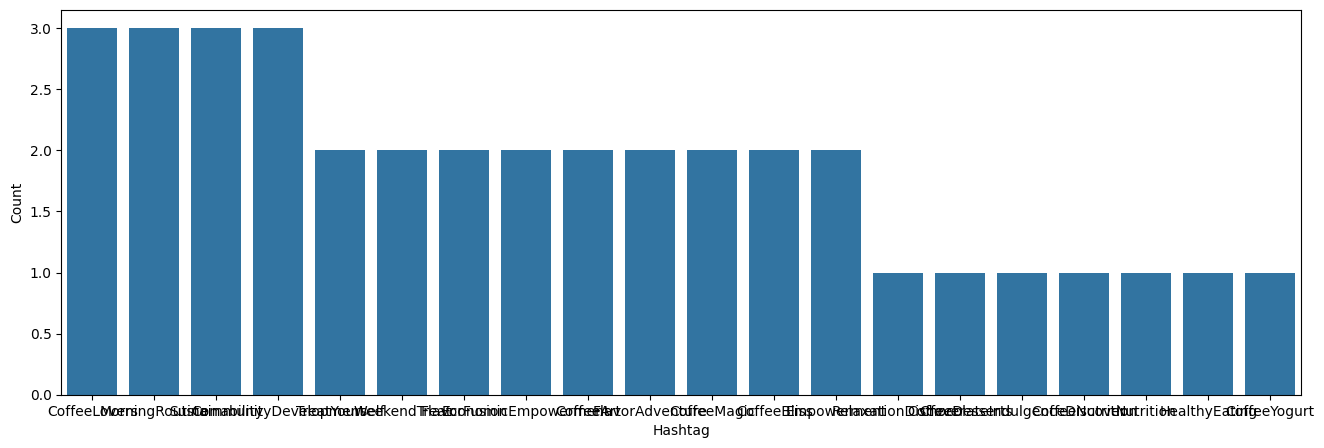

In [ ]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# Importing gensim
from gensim.models import Word2Vec

# Creating a Word2Vec model
model_w2v = Word2Vec(
    tokenized_tweet,
    vector_size=200,  # Desired number of features/independent variables
    window=5,         # Context window size
    min_count=2,
    sg=1,             # 1 for skip-gram model
    hs=0,
    negative=10,      # For negative sampling
    workers=2,        # Number of cores
    seed=34
)

model_w2v.train(tokenized_tweet, total_examples=len(train['tweets']), epochs=20)

(34091, 64620)

In [ ]:
model_w2v.wv.most_similar(positive = "coffee")

[('delicious', 0.9812871217727661),
 ('methods', 0.9804844260215759),
 ('different', 0.9799234867095947),
 ('to', 0.9771720767021179),
 ('moment', 0.9770768880844116),
 ('perfect', 0.9757371544837952),
 ('specialty', 0.975710391998291),
 ('right', 0.9753007292747498),
 ('experience', 0.9752967357635498),
 ('journey', 0.9750708341598511)]

In [ ]:
model_w2v.wv.most_similar(positive = "nice")

[('enjoyed', 0.9986833333969116),
 ('preferred', 0.9960803985595703),
 ('Margaret', 0.9955252408981323),
 ('back', 0.9945654273033142),
 ('bad', 0.9942712783813477),
 ('Kenyatta', 0.9942282438278198),
 ('had', 0.9938174486160278),
 ('market', 0.9935696125030518),
 ('I', 0.9933701753616333),
 ('Rachel', 0.9931390881538391)]

In [ ]:
model_w2v.wv.most_similar(positive = "like")

[('youghut', 0.9831647276878357),
 ('Babies', 0.9760992527008057),
 ('preferred', 0.9734458923339844),
 ('impact', 0.972871720790863),
 ('nice', 0.9720145463943481),
 ('well-being.', 0.9718161821365356),
 ('I', 0.9714533090591431),
 ('#CoffeeNutrition', 0.9710301756858826),
 ('Margaret', 0.9704018235206604),
 ('Mothers', 0.9695283770561218)]

In [ ]:
model_w2v.wv.most_similar(negative = "don't")

[('mothers-live', -0.6558980941772461),
 ('outcomes', -0.6583989262580872),
 ('Live', -0.6653802990913391),
 ('not', -0.669119656085968),
 ('Economic', -0.6736343502998352),
 ('boosts', -0.6760775446891785),
 ('babies', -0.676200807094574),
 ('health', -0.6784539818763733),
 ('only', -0.682102382183075),
 ('campaign.', -0.6827969551086426)]

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['Well', 'done', 'Dedan', 'Kimathi', 'University.', 'Your', 'coffee', 'is', 'super!!', '??'], tags=['tweet_0']),
 TaggedDocument(words=['Dedan', 'Kimathi', 'University', 'unveils', 'machine', 'powered', 'by', 'a', 'motorbike.', 'The', 'machine', 'can', 'process', 'up', 'to', '400kgs', 'of', 'cherry', 'per', 'hour'], tags=['tweet_1']),
 TaggedDocument(words=['Dedan', 'Kimathi', 'University,', 'Nyeri', 'county', 'grows', 'and', 'processes', 'some', 'of', 'the', 'best', 'coffee', 'and', 'dairy', 'products', 'in', 'Kenya.'], tags=['tweet_2']),
 TaggedDocument(words=['Bad', 'weather', 'could', 'allow', 'mwe', 'go', 'get', 'the', 'dekut', 'coffe', 'today'], tags=['tweet_3']),
 TaggedDocument(words=['Local', 'Premium', 'coffee', 'from', 'Dedan', 'Kimathi', 'University', 'keeps', 'me', 'going'], tags=['tweet_4']),
 TaggedDocument(words=['Nyeri', 'International', 'Coffee', 'Expo', 'that', 'is', 'being', 'held', 'at', 'Dedan', 'Kimathi', 'University', 'has', 'attracted', '2

In [ ]:
# removing unwanted patterns from the data

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_corpus = []

for i in range(len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['tweets'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Joining them back with space
    review = ' '.join(review)
    train_corpus.append(review)


In [ ]:
test_corpus = []

for i in range(len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['tweets'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()

    # Stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

    # Joining them back with space
    review = ' '.join(review)
    test_corpus.append(review)

In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(120, 662)
(120,)


In [ ]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(50, 507)


In [ ]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(90, 662)
(30, 662)
(90,)
(30,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

# Instantiate Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the validation set
y_pred = model.predict(x_valid)

# Calculate training and validation accuracy
train_accuracy = model.score(x_train, y_train)
valid_accuracy = model.score(x_valid, y_valid)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)

# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred, average='weighted')
print("F1 Score:", f1)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:\n", cm)

Training Accuracy: 0.9479166666666666
Validation Accuracy: 0.4583333333333333
F1 Score: 0.4230124521072797
Confusion Matrix:
 [[1 0 1]
 [0 2 9]
 [0 3 8]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred, average='weighted')
print("F1 Score:", f1)

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9583333333333334
Validation Accuracy : 0.4583333333333333
F1 Score: 0.46316425120772947
[[1 1 0]
 [0 5 6]
 [0 6 5]]


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

f1 = f1_score(y_valid, y_pred, average='weighted')
print("F1 Score:", f1)
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.6666666666666666
Validation Accuracy : 0.4583333333333333
F1 Score: 0.2880952380952381
[[ 0  0  2]
 [ 0  0 11]
 [ 0  0 11]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Map class labels to sequential integers starting from 0
class_mapping = {-1: 0, 0: 1, 1: 2}
y_train_mapped = np.array([class_mapping[label] for label in y_train])
y_valid_mapped = np.array([class_mapping[label] for label in y_valid])

# Instantiate XGBoost Classifier model
model = XGBClassifier()
model.fit(x_train, y_train_mapped)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train_mapped))
print("Validation Accuracy :", model.score(x_valid, y_valid_mapped))

f1 = f1_score(y_valid_mapped, y_pred, average='weighted')
print("F1 Score:", f1)

# confusion matrix
cm = confusion_matrix(y_valid_mapped, y_pred)
print(cm)

Training Accuracy : 0.9583333333333334
Validation Accuracy : 0.25
F1 Score: 0.23425925925925928
[[0 1 1]
 [2 1 8]
 [1 5 5]]


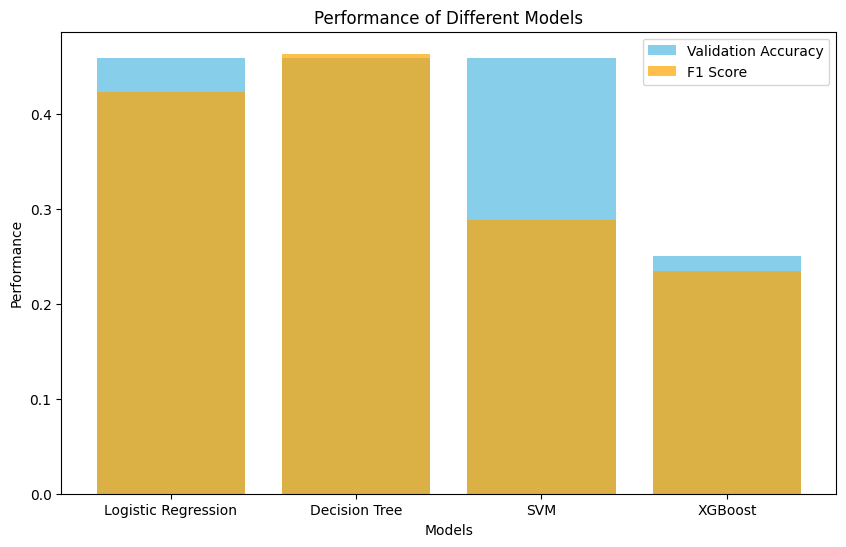

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'XGBoost']

# Validation accuracy for each model
valid_accuracies = [0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.25]

# F1 score for each model
f1_scores = [0.4230124521072797, 0.46316425120772947, 0.2880952380952381, 0.23425925925925928]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(models, valid_accuracies, color='skyblue', label='Validation Accuracy')
plt.bar(models, f1_scores, color='orange', alpha=0.7, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance of Different Models')
plt.legend()

plt.show()

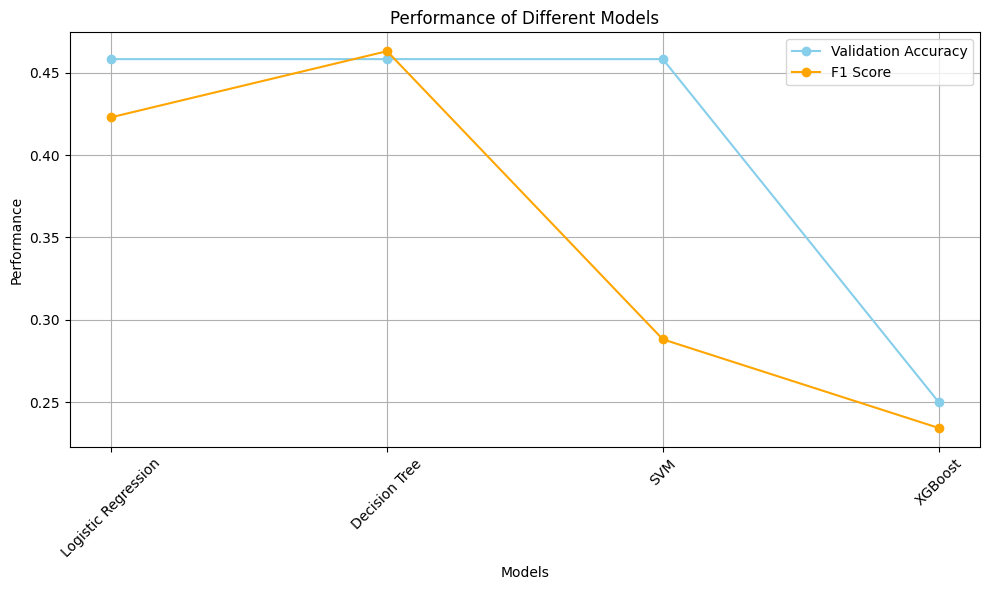

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'XGBoost']

# Validation accuracy for each model
valid_accuracies = [0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.25]

# F1 score for each model
f1_scores = [0.4230124521072797, 0.46316425120772947, 0.2880952380952381, 0.23425925925925928]

# Plotting
plt.figure(figsize=(10, 6))

# Plot validation accuracy
plt.plot(models, valid_accuracies, marker='o', label='Validation Accuracy', color='skyblue')

# Plot F1 score
plt.plot(models, f1_scores, marker='o', label='F1 Score', color='orange')

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance of Different Models')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()